# stats를 분석하기 위한 노트북

- target: stats -> ~~*stats_weighted_score*~~, **stats_drop_rate** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 로드
df_final = pd.read_parquet("data/processed/df_final.parquet")
df_eda = pd.read_parquet("data/processed/df_eda.parquet")
df_clean_eda = pd.read_parquet("data/processed/df_clean_eda.parquet")

print("데이터 로드 완료:")
print(df_final.shape, df_eda.shape, df_clean_eda.shape)

데이터 로드 완료:
(10000, 253) (10000, 32) (10000, 27)


In [3]:
# 공통 컬럼 정의

INT_COLS = [
    "seasonYear", "seasonInt",
    "episodes", "duration",
    "popularity", "favourites",
]

SCORE_COLS = [
    "stats_weighted_score",
    "stats_drop_rate",
    "averageScore",
    "meanScore",
]

COUNT_COLS = [
    "popularity",
    "favourites",
    "episodes",
    "duration",
]

NUMERIC_COLS = SCORE_COLS + COUNT_COLS

In [70]:
df_final[NUMERIC_COLS].describe()

,stats_weighted_score,stats_drop_rate,averageScore,meanScore,popularity,favourites,episodes,duration
count,10000.000000,10000.000000,9677.000000,9701.000000,10000.000000,10000.00000,9719.00000,9672.000000
mean,67.308143,0.037913,64.898109,66.053087,26290.726400,637.20290,13.42134,30.701923
std,9.721971,0.037583,9.546104,9.480559,62319.927487,2748.72442,31.83612,27.431466
min,10.000000,0.000000,16.000000,10.000000,742.000000,0.00000,1.00000,1.000000
25%,61.771380,0.012726,59.000000,61.000000,1875.000000,14.00000,1.00000,20.000000
50%,67.893801,0.026769,65.000000,67.000000,5598.000000,48.00000,10.00000,24.000000
75%,73.692857,0.049144,71.000000,72.000000,21768.500000,251.00000,13.00000,27.000000
max,95.048924,0.354764,91.000000,91.000000,923138.000000,89678.00000,1787.00000,168.000000


In [4]:
DROP_DATE_COLS = [
    "start_year", "start_month", "start_day",
    "end_year", "end_month", "end_day",
    "airing_days",
]

df_clean_eda = df_clean_eda.drop(columns=DROP_DATE_COLS)

In [5]:
# df_clean_eda[SCORE_COLS].describe()
df_clean_eda[SCORE_COLS].isna().sum()
df_clean_eda[INT_COLS].isna().sum()

seasonYear    873
seasonInt     854
episodes      281
duration      328
popularity      0
favourites      0
dtype: int64

In [6]:
missing_score_df = df_clean_eda[
    df_clean_eda["averageScore"].isna() | df_clean_eda["meanScore"].isna()
]

missing_score_df.shape

(323, 20)

In [7]:
missing_score_df[[
    "title_romaji",
    "popularity",
    "favourites",
    "episodes",
    "stats_weighted_score",
    "stats_drop_rate"
]].head(20)

,title_romaji,popularity,favourites,episodes,stats_weighted_score,stats_drop_rate
841,Jujutsu Kaisen: Shimetsu Kaiyuu - Zenpen,76784,913,NaN,86.851464,0.001341
869,Sousou no Frieren 2nd Season,74717,1028,NaN,90.900000,0.000977
1031,Jigokuraku 2nd Season,63713,628,NaN,84.054622,0.001475
1408,[Oshi no Ko] 3rd Season,46454,543,NaN,86.758105,0.002174
1516,Youjo Senki II,42681,463,NaN,82.913534,0.001945
1539,Mushoku Tensei III: Isekai Ittara Honki Dasu,41799,585,NaN,88.202020,0.002177
1776,Mahou Shoujo Madoka☆Magica: Walpurgis no Kaiten,34881,359,1.0,88.707124,0.001863
1809,Kage no Jitsuryokusha ni Naritakute!: Zankyou-hen,34270,553,1.0,89.154412,0.002043
1892,Dungeon Meshi 2nd Season,32370,255,NaN,87.643979,0.000834
1928,Enen no Shouboutai: San no Shou Part 2,31477,302,NaN,83.650794,0.002764


In [8]:
missing_score_df[
    ["title_romaji", "stats_weighted_score", "averageScore", "meanScore"]
].head(20)

,title_romaji,stats_weighted_score,averageScore,meanScore
841,Jujutsu Kaisen: Shimetsu Kaiyuu - Zenpen,86.851464,NaN,NaN
869,Sousou no Frieren 2nd Season,90.900000,NaN,NaN
1031,Jigokuraku 2nd Season,84.054622,NaN,NaN
1408,[Oshi no Ko] 3rd Season,86.758105,NaN,NaN
1516,Youjo Senki II,82.913534,NaN,NaN
1539,Mushoku Tensei III: Isekai Ittara Honki Dasu,88.202020,NaN,NaN
1776,Mahou Shoujo Madoka☆Magica: Walpurgis no Kaiten,88.707124,NaN,NaN
1809,Kage no Jitsuryokusha ni Naritakute!: Zankyou-hen,89.154412,NaN,NaN
1892,Dungeon Meshi 2nd Season,87.643979,NaN,NaN
1928,Enen no Shouboutai: San no Shou Part 2,83.650794,NaN,NaN


In [9]:
df_upcoming = df_clean_eda[df_clean_eda["status"] == "NOT_YET_RELEASED"]
df_upcoming.shape

(299, 20)

In [10]:
df_clean_eda = df_clean_eda[df_clean_eda["status"] != "NOT_YET_RELEASED"].copy()

print(df_clean_eda[SCORE_COLS].isna().sum())
print(df_clean_eda[INT_COLS].isna().sum())

stats_weighted_score     0
stats_drop_rate          0
averageScore            24
meanScore                0
dtype: int64
seasonYear    676
seasonInt     657
episodes       47
duration       38
popularity      0
favourites      0
dtype: int64


In [11]:
df_clean_eda = df_clean_eda.dropna(subset=["averageScore"]).copy()

print(df_clean_eda[SCORE_COLS].isna().sum())
print(df_clean_eda[INT_COLS].isna().sum())

stats_weighted_score    0
stats_drop_rate         0
averageScore            0
meanScore               0
dtype: int64
seasonYear    670
seasonInt     651
episodes       45
duration       28
popularity      0
favourites      0
dtype: int64


In [12]:
missing_score_df = df_clean_eda[
    df_clean_eda["seasonYear"].isna() | df_clean_eda["seasonInt"].isna()
]

missing_score_df.shape

(670, 20)

In [13]:
missing_score_df[
    ["title_romaji", "stats_weighted_score", "seasonYear", "seasonInt"]
].head(20)

# 죄다 중국꺼네?

,title_romaji,stats_weighted_score,seasonYear,seasonInt
377,Shiguang Dailiren,87.274929,NaN,NaN
497,Xian Wang De Richang Shenghuo,74.347582,NaN,NaN
715,Tu Bian Yingxiong X,86.592042,NaN,NaN
778,Quanzhi Gaoshou,76.231391,NaN,NaN
863,Guimi Zhi Zhu,85.988852,NaN,NaN
1043,Modao Zushi,83.253831,NaN,NaN
1125,Shiguang Dailiren II,87.351021,NaN,NaN
1134,Xian Wang De Richang Shenghuo 2,74.990074,NaN,NaN
1186,Tian Guan Ci Fu,84.800559,NaN,NaN
1260,Yi Ren Zhi Xia,65.050839,NaN,NaN


In [14]:
df_clean_eda = df_clean_eda.dropna(subset=["seasonYear"]).copy()

print(df_clean_eda[SCORE_COLS].isna().sum())
print(df_clean_eda[INT_COLS].isna().sum())

stats_weighted_score    0
stats_drop_rate         0
averageScore            0
meanScore               0
dtype: int64
seasonYear     0
seasonInt      0
episodes      38
duration       8
popularity     0
favourites     0
dtype: int64


In [15]:
df_clean_eda = df_clean_eda.dropna(subset=["episodes", "duration"])

In [71]:
df_clean_eda.describe()

,id,seasonYear,seasonInt,episodes,duration,averageScore,meanScore,popularity,favourites,stats_weighted_score,stats_drop_rate,start_dt,end_dt,log_popularity,log_favourites
count,8962.000000,8962.000000,8962.000000,8962.000000,8962.000000,8962.000000,8962.000000,8962.000000,8962.000000,8962.000000,8962.000000,8954,8929,8962.000000,8962.000000
mean,49700.883620,2009.808413,275.305066,13.374024,31.652198,65.035483,66.084468,28617.897010,688.341776,67.081655,0.039542,2010-04-08 23:39:24.887201024,2010-07-23 23:20:00.268786944,8.973788,4.313254
min,1.000000,1943.000000,1.000000,1.000000,1.000000,16.000000,16.000000,743.000000,0.000000,17.464056,0.001014,1943-03-25 00:00:00,1943-03-25 00:00:00,6.612041,0.000000
25%,2962.250000,2004.000000,104.000000,1.000000,23.000000,59.000000,61.000000,2105.250000,15.000000,61.812610,0.013762,2004-07-12 12:00:00,2004-12-22 00:00:00,7.652664,2.772589
50%,16111.000000,2013.000000,171.000000,11.000000,24.000000,65.000000,67.000000,6525.500000,54.000000,67.720818,0.028169,2012-12-30 00:00:00,2013-03-28 00:00:00,8.783626,4.007333
75%,103295.000000,2018.000000,234.000000,13.000000,28.000000,71.000000,72.000000,25044.000000,299.000000,73.172743,0.051280,2018-11-13 00:00:00,2019-01-25 00:00:00,10.128429,5.703782
max,198188.000000,2025.000000,994.000000,1787.000000,168.000000,91.000000,91.000000,923138.000000,69836.000000,92.232922,0.354764,2025-11-21 00:00:00,2026-01-30 00:00:00,13.735535,11.153919
std,59748.455525,11.756589,293.798137,30.195768,27.590710,9.406366,9.232016,64975.208092,2736.491567,9.256049,0.038369,NaN,NaN,1.560956,2.006735


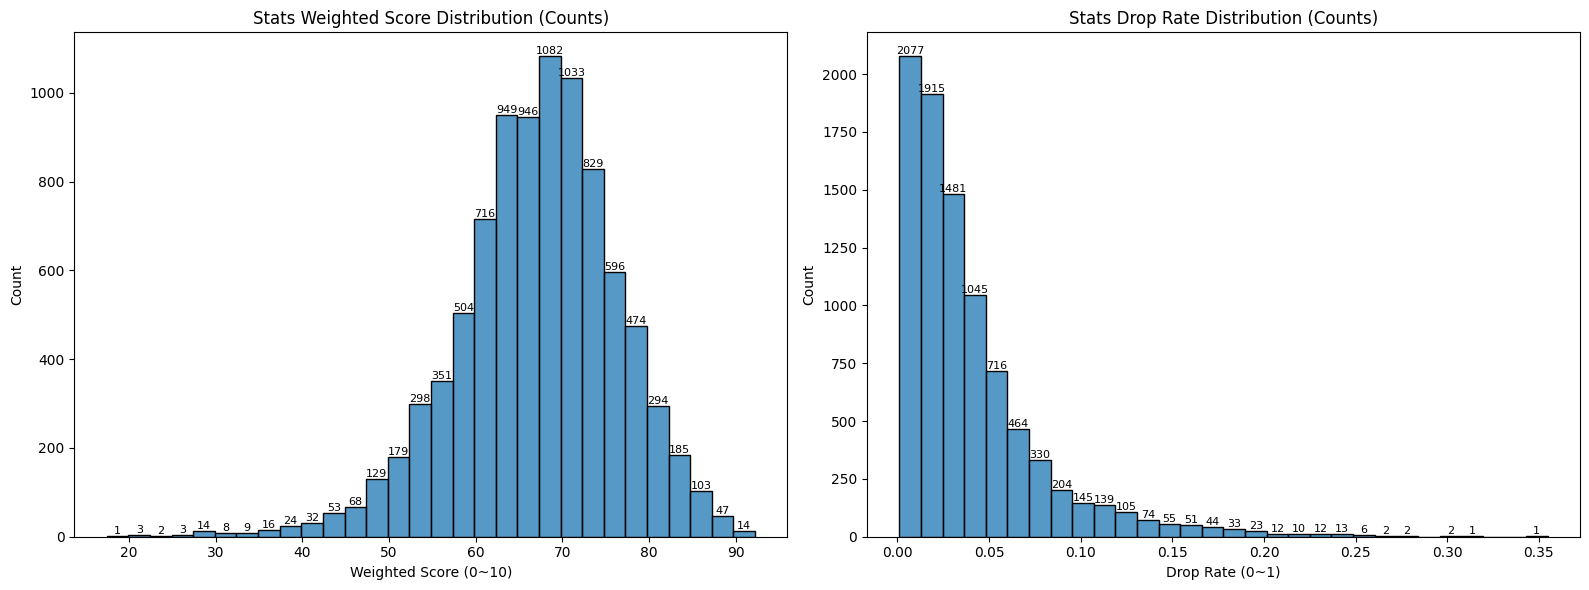

In [16]:
plt.figure(figsize=(16, 6))

# ==============================
# 1) stats_weighted_score
# ==============================
ax1 = plt.subplot(1, 2, 1)
hist1 = sns.histplot(
    df_clean_eda["stats_weighted_score"],
    bins=30,
    kde=False,
    ax=ax1
)

# 막대 위에 y값 표시
for p in hist1.patches:
    h = p.get_height()
    if h > 0:
        ax1.text(
            p.get_x() + p.get_width() / 2,
            h,
            str(int(h)),
            ha="center",
            va="bottom",
            fontsize=8
        )

ax1.set_title("Stats Weighted Score Distribution (Counts)")
ax1.set_xlabel("Weighted Score (0~10)")


# ==============================
# 2) stats_drop_rate
# ==============================
ax2 = plt.subplot(1, 2, 2)
hist2 = sns.histplot(
    df_clean_eda["stats_drop_rate"],
    bins=30,
    kde=False,
    ax=ax2
)

# 막대 위에 y값 표시
for p in hist2.patches:
    h = p.get_height()
    if h > 0:
        ax2.text(
            p.get_x() + p.get_width() / 2,
            h,
            str(int(h)),
            ha="center",
            va="bottom",
            fontsize=8
        )

ax2.set_title("Stats Drop Rate Distribution (Counts)")
ax2.set_xlabel("Drop Rate (0~1)")

plt.tight_layout()
plt.show()

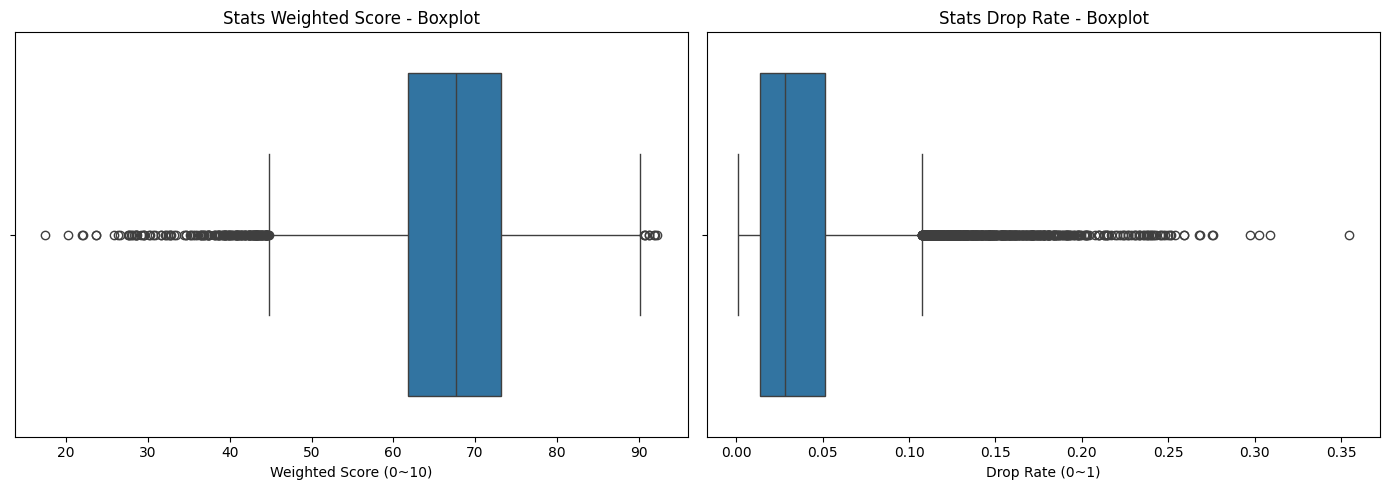

In [17]:
plt.figure(figsize=(14, 5))

# 1) stats_weighted_score boxplot
ax1 = plt.subplot(1, 2, 1)
sns.boxplot(
    x=df_clean_eda["stats_weighted_score"],
    ax=ax1
)
ax1.set_title("Stats Weighted Score - Boxplot")
ax1.set_xlabel("Weighted Score (0~10)")

# 2) stats_drop_rate boxplot
ax2 = plt.subplot(1, 2, 2)
sns.boxplot(
    x=df_clean_eda["stats_drop_rate"],
    ax=ax2
)
ax2.set_title("Stats Drop Rate - Boxplot")
ax2.set_xlabel("Drop Rate (0~1)")


plt.tight_layout()
plt.show()

# Target vs. Popularity

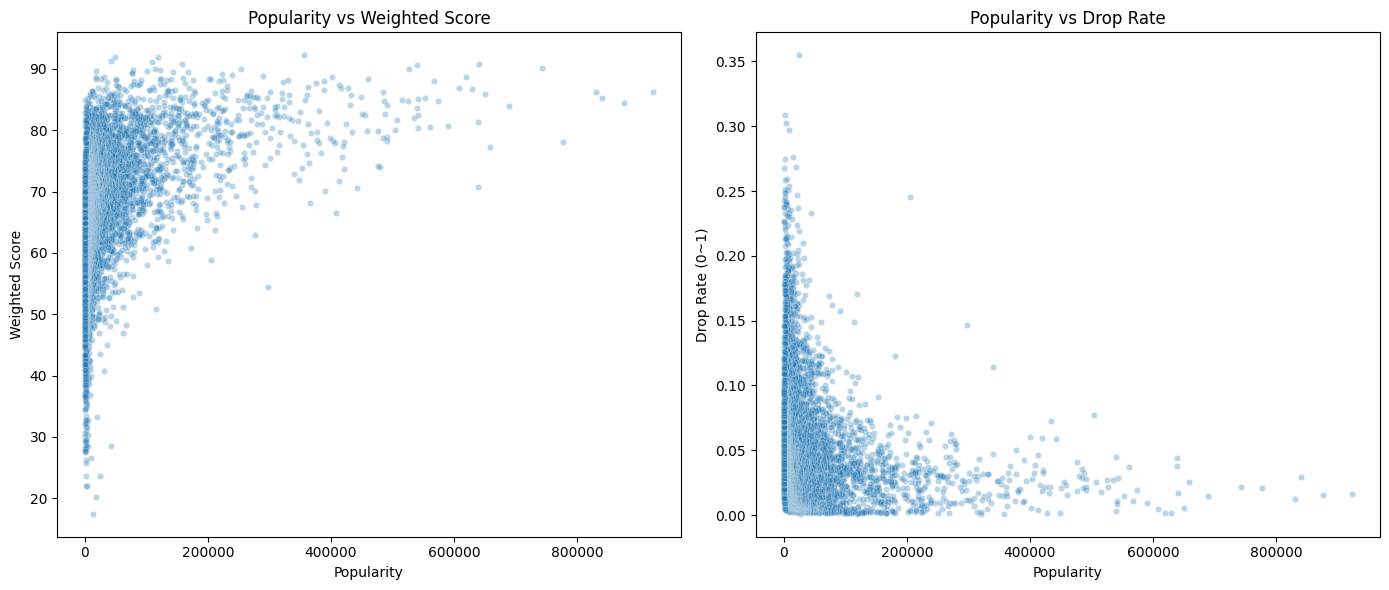

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# popularity vs weighted_score
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x=df_clean_eda["popularity"],
    y=df_clean_eda["stats_weighted_score"],
    alpha=0.3,
    s=20
)
ax1.set_title("Popularity vs Weighted Score")
ax1.set_xlabel("Popularity")
ax1.set_ylabel("Weighted Score")

# popularity vs drop_rate
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x=df_clean_eda["popularity"],
    y=df_clean_eda["stats_drop_rate"],
    alpha=0.3,
    s=20
)
ax2.set_title("Popularity vs Drop Rate")
ax2.set_xlabel("Popularity")
ax2.set_ylabel("Drop Rate (0~1)")

plt.tight_layout()
plt.show()

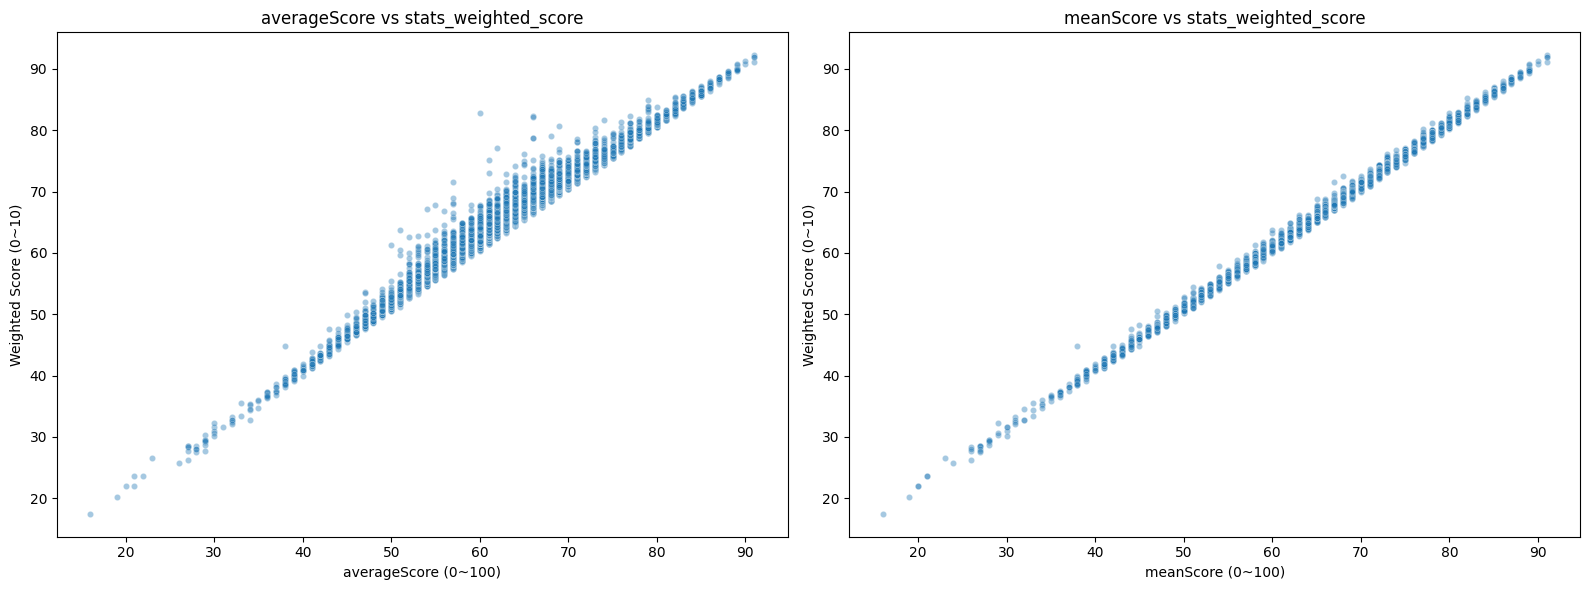

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))

# 1) weighted_score vs averageScore
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x=df_clean_eda["averageScore"],
    y=df_clean_eda["stats_weighted_score"],
    alpha=0.4,
    s=20
)
ax1.set_title("averageScore vs stats_weighted_score")
ax1.set_xlabel("averageScore (0~100)")
ax1.set_ylabel("Weighted Score (0~10)")

# 2) weighted_score vs meanScore
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x=df_clean_eda["meanScore"],
    y=df_clean_eda["stats_weighted_score"],
    alpha=0.4,
    s=20
)
ax2.set_title("meanScore vs stats_weighted_score")
ax2.set_xlabel("meanScore (0~100)")
ax2.set_ylabel("Weighted Score (0~10)")

plt.tight_layout()
plt.show()

# weighted score ≈ averageScore ≈ meanScore
- 너무 밀접하게 관계 있고, 실제로 Anilist 내부적으로 점수를 낼 때 쓰이기 때문에, 분석 의미가 없을 것으로 예상, Target에서 제외.

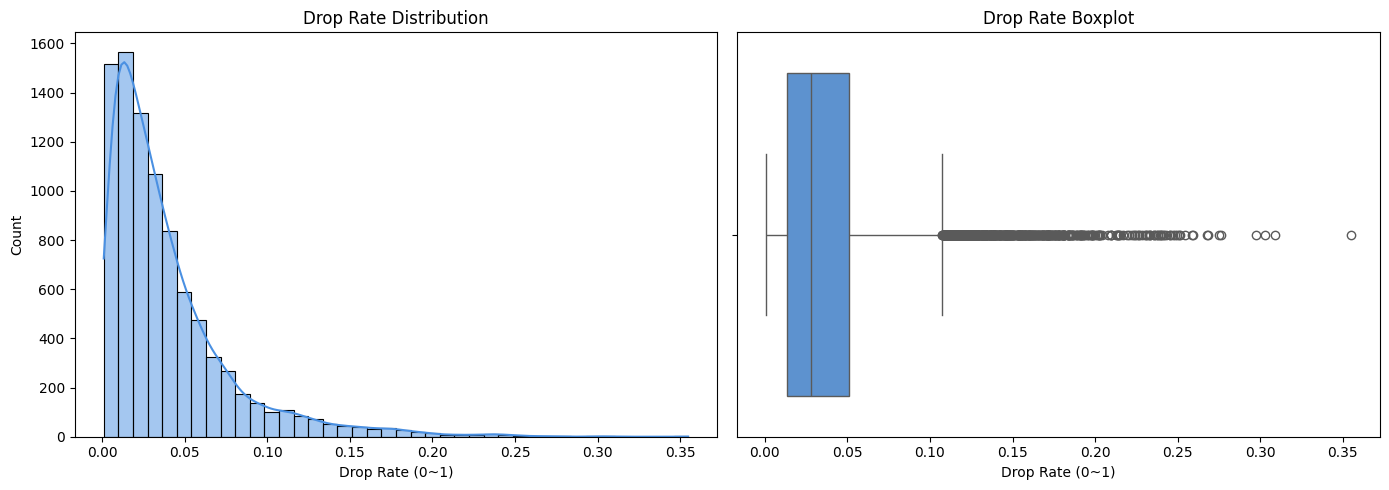

In [20]:
plt.figure(figsize=(14, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_clean_eda["stats_drop_rate"], bins=40, kde=True, color="#4A90E2")
plt.title("Drop Rate Distribution")
plt.xlabel("Drop Rate (0~1)")
plt.ylabel("Count")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean_eda["stats_drop_rate"], color="#4A90E2")
plt.title("Drop Rate Boxplot")
plt.xlabel("Drop Rate (0~1)")

plt.tight_layout()
plt.show()

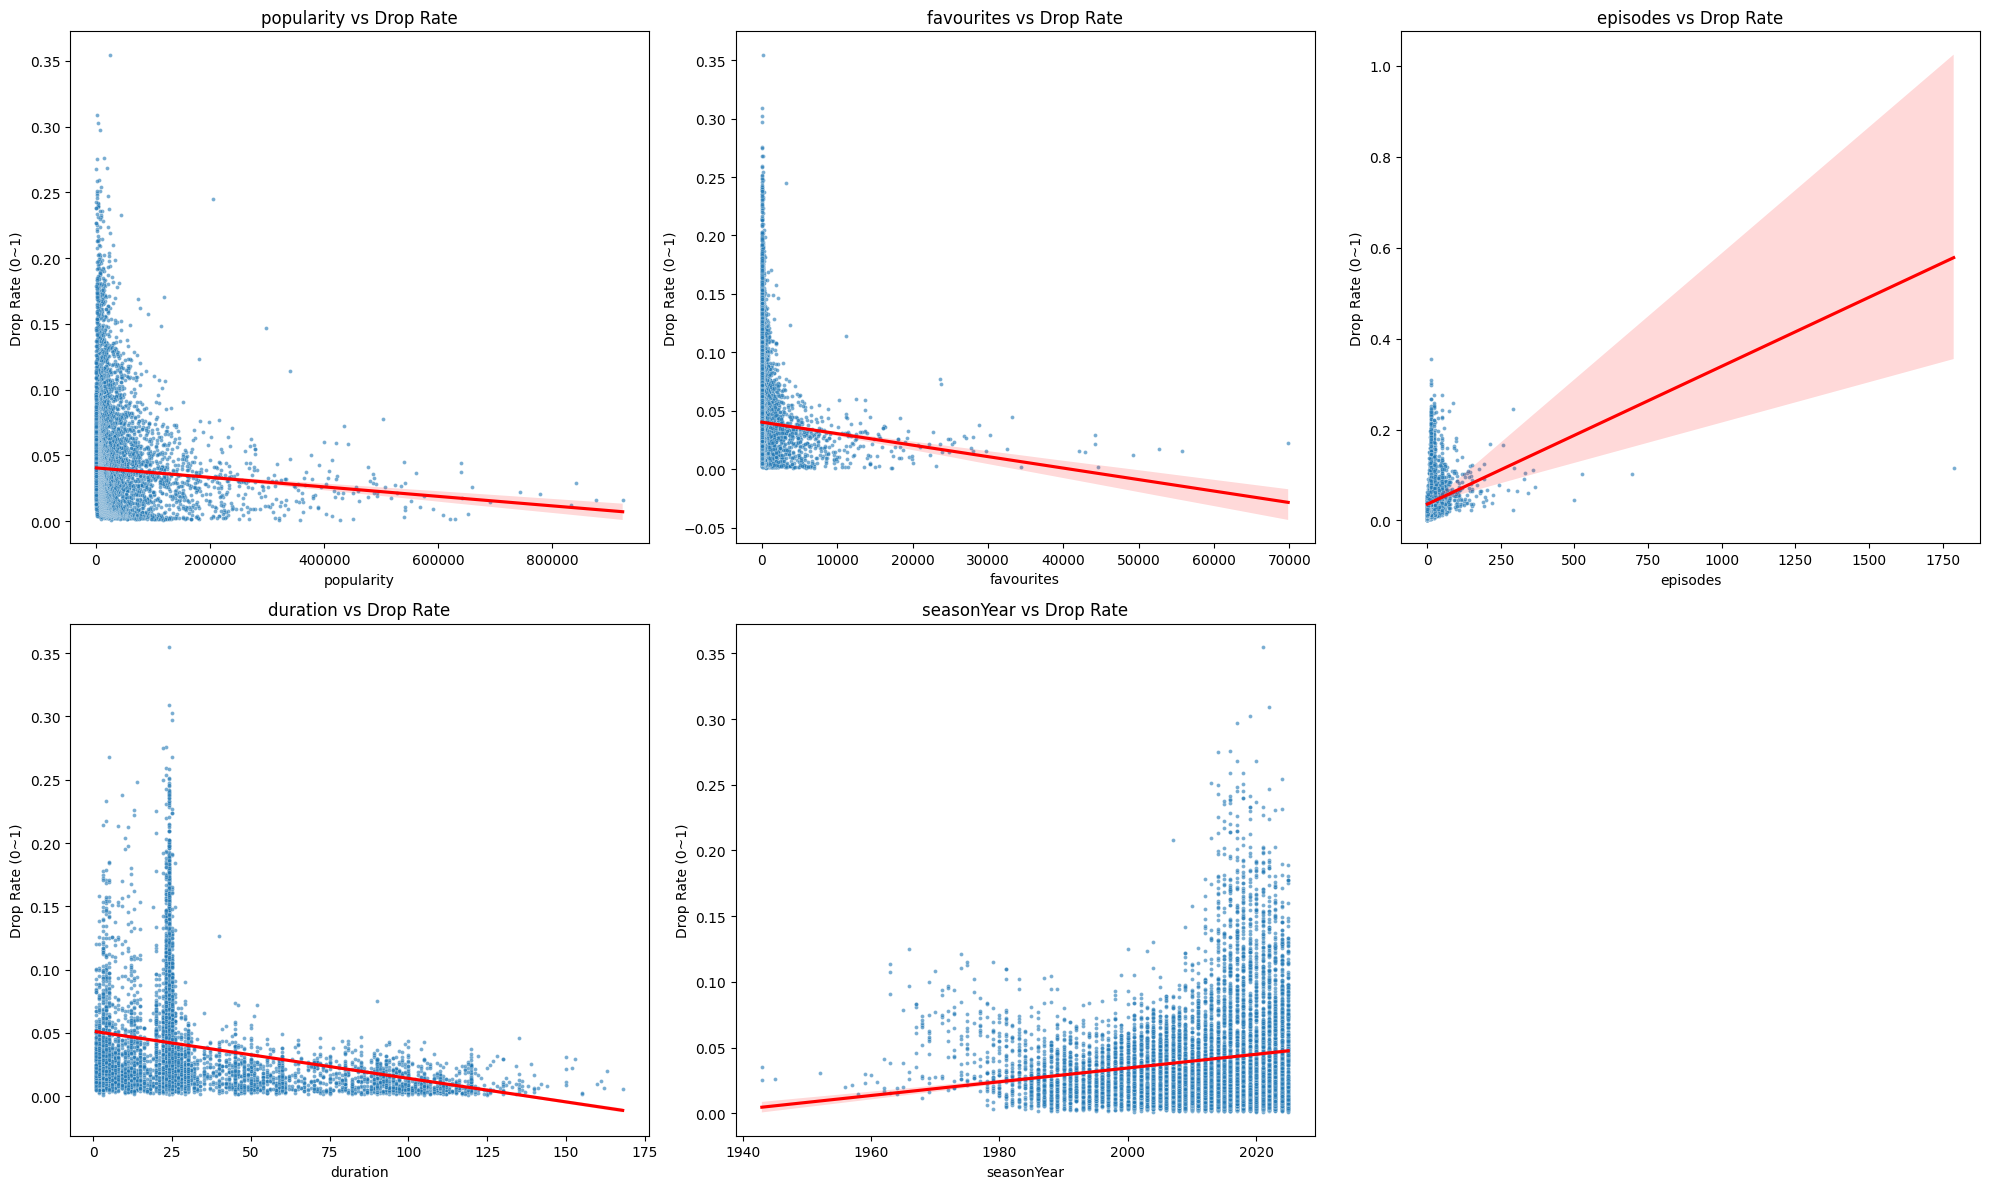

In [21]:
FEATURE_FOR_DROP = [
    "popularity",
    "favourites",
    "episodes",
    "duration",
    "seasonYear",
]

plt.figure(figsize=(20, 12))

for i, col in enumerate(FEATURE_FOR_DROP, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(
        x=df_clean_eda[col],
        y=df_clean_eda["stats_drop_rate"],
        s=8,
        alpha=0.6
    )
    sns.regplot(
        x=df_clean_eda[col],
        y=df_clean_eda["stats_drop_rate"],
        scatter=False,
        color="red"
    )
    plt.title(f"{col} vs Drop Rate")
    plt.xlabel(col)
    plt.ylabel("Drop Rate (0~1)")

plt.tight_layout()
plt.show()

In [22]:
cols = ["stats_drop_rate", "popularity", "favourites", "episodes", "duration", "seasonYear"]
df_clean_eda[cols].corr(method="spearman")  # rank 기반 상관

,stats_drop_rate,popularity,favourites,episodes,duration,seasonYear
stats_drop_rate,1.000000,-0.095022,-0.048046,0.671497,-0.285486,0.102468
popularity,-0.095022,1.000000,0.942637,0.203934,0.056529,0.384179
favourites,-0.048046,0.942637,1.000000,0.294157,0.114548,0.372956
episodes,0.671497,0.203934,0.294157,1.000000,-0.344133,0.014394
duration,-0.285486,0.056529,0.114548,-0.344133,1.000000,-0.199778
seasonYear,0.102468,0.384179,0.372956,0.014394,-0.199778,1.000000


## episode 파편화.
- 26, 52화로 줄여보면? (1기 기준 대략 분량 수치임)

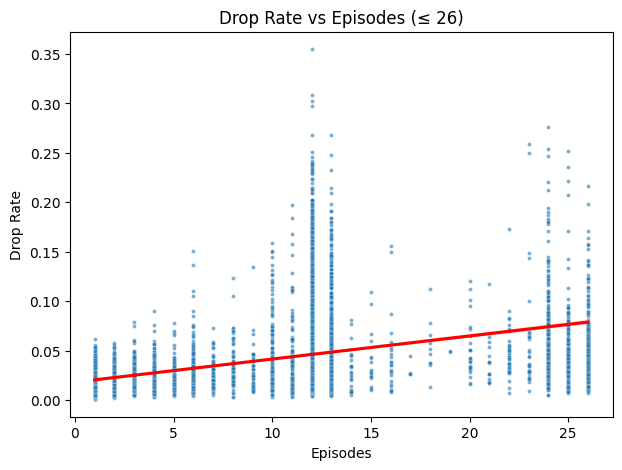

In [23]:
mask_26 = df_clean_eda["episodes"] <= 26

plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=df_clean_eda.loc[mask_26, "episodes"],
    y=df_clean_eda.loc[mask_26, "stats_drop_rate"],
    s=8, alpha=0.6
)
sns.regplot(
    x=df_clean_eda.loc[mask_26, "episodes"],
    y=df_clean_eda.loc[mask_26, "stats_drop_rate"],
    scatter=False, color="red"
)
plt.title("Drop Rate vs Episodes (≤ 26)")
plt.xlabel("Episodes")
plt.ylabel("Drop Rate")
plt.show()

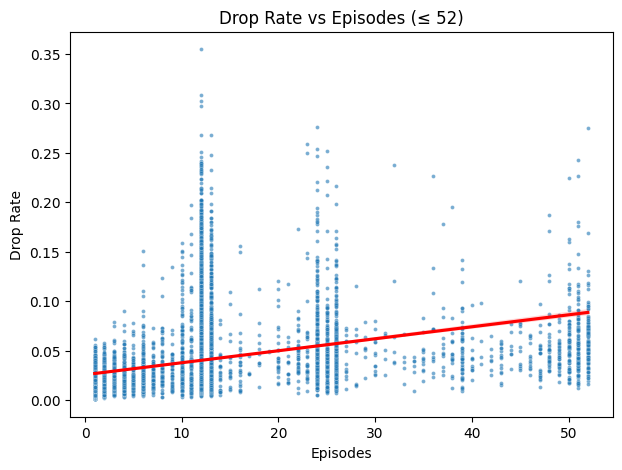

In [24]:
mask_52 = df_clean_eda["episodes"] <= 52

plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=df_clean_eda.loc[mask_52, "episodes"],
    y=df_clean_eda.loc[mask_52, "stats_drop_rate"],
    s=8, alpha=0.6
)
sns.regplot(
    x=df_clean_eda.loc[mask_52, "episodes"],
    y=df_clean_eda.loc[mask_52, "stats_drop_rate"],
    scatter=False, color="red"
)
plt.title("Drop Rate vs Episodes (≤ 52)")
plt.xlabel("Episodes")
plt.ylabel("Drop Rate")
plt.show()

## popularity / favourites log 스케일링
- Drop Rate는 0에 치우쳐 있고, popularity/favourites는 극단적 long-tail이라
**log 변환(log1p)**이 훨씬 잘 보임.

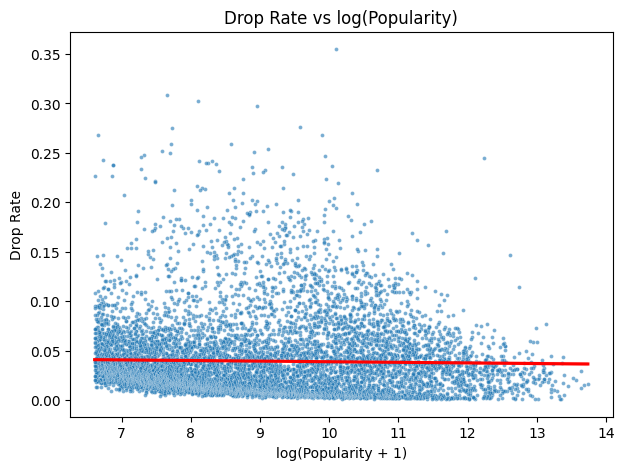

In [25]:
df_clean_eda["log_popularity"] = np.log1p(df_clean_eda["popularity"])

plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=df_clean_eda["log_popularity"],
    y=df_clean_eda["stats_drop_rate"],
    s=8, alpha=0.6
)
sns.regplot(
    x=df_clean_eda["log_popularity"],
    y=df_clean_eda["stats_drop_rate"],
    scatter=False, color="red"
)
plt.title("Drop Rate vs log(Popularity)")
plt.xlabel("log(Popularity + 1)")
plt.ylabel("Drop Rate")
plt.show()

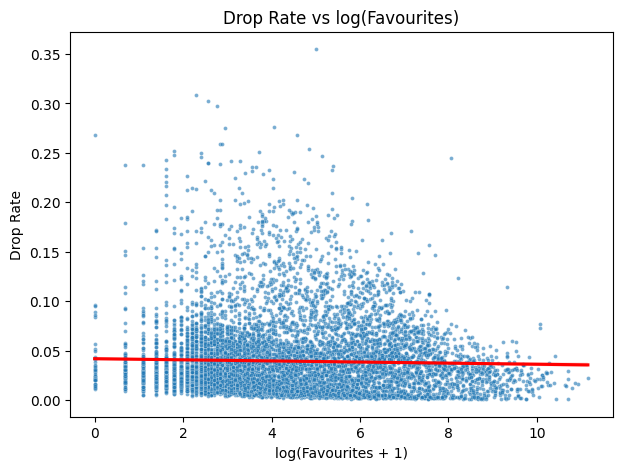

In [26]:
df_clean_eda["log_favourites"] = np.log1p(df_clean_eda["favourites"])

plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=df_clean_eda["log_favourites"],
    y=df_clean_eda["stats_drop_rate"],
    s=8, alpha=0.6
)
sns.regplot(
    x=df_clean_eda["log_favourites"],
    y=df_clean_eda["stats_drop_rate"],
    scatter=False, color="red"
)
plt.title("Drop Rate vs log(Favourites)")
plt.xlabel("log(Favourites + 1)")
plt.ylabel("Drop Rate")
plt.show()

# drop rate

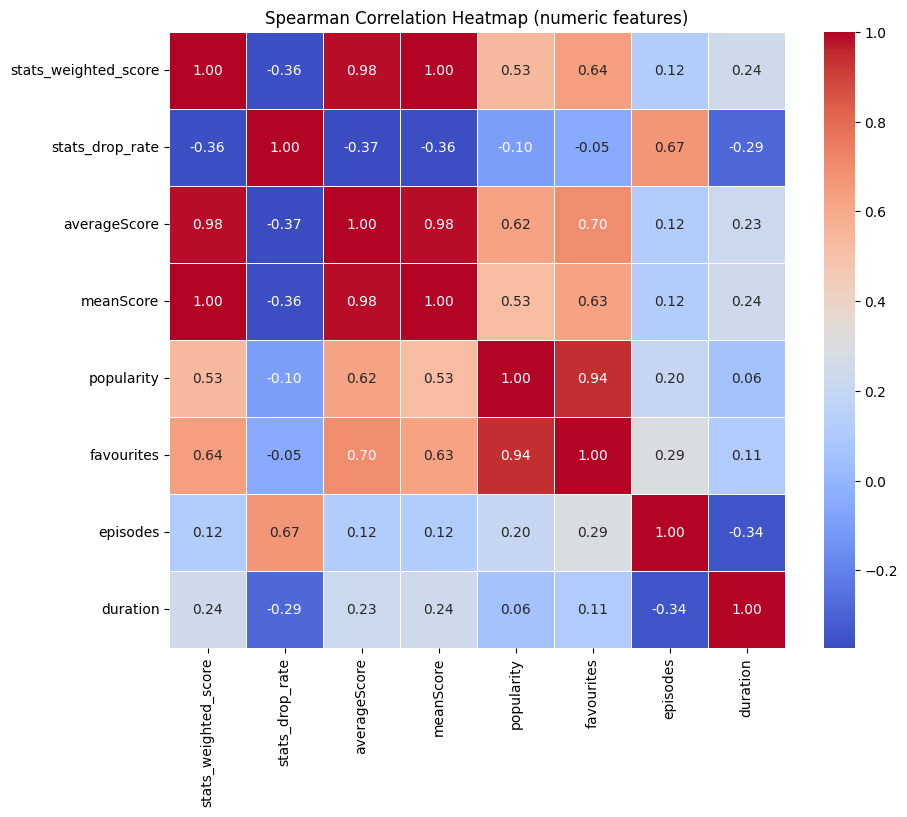

In [56]:
plt.figure(figsize=(10, 8))
corr_matrix = df_clean_eda[NUMERIC_COLS].corr(method="spearman")

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=.5,
    square=True
)

plt.title("Spearman Correlation Heatmap (numeric features)")
plt.show()

## drop rate 분포

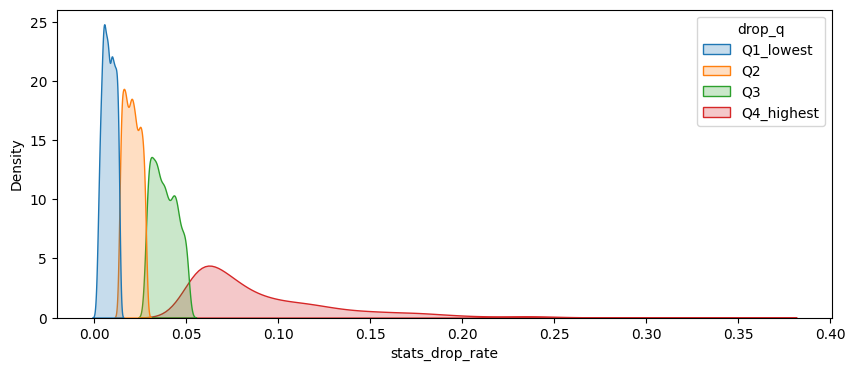

In [55]:
plt.figure(figsize=(10,4))
sns.kdeplot(data=df_clean_eda, x="stats_drop_rate", hue="drop_q", fill=True)
plt.show()

## 트랜스폼 방향성 확인

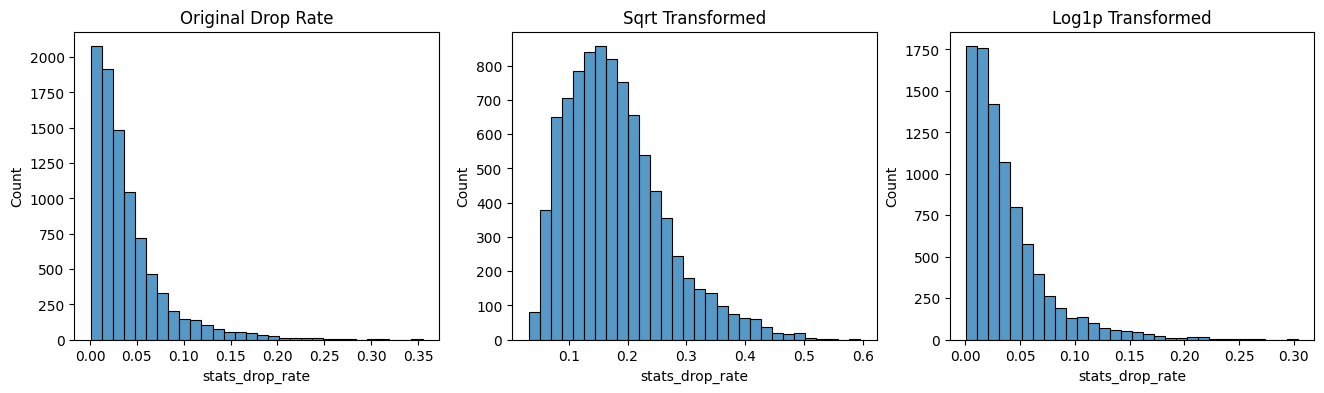

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

sns.histplot(df_clean_eda["stats_drop_rate"], bins=30, ax=axes[0])
axes[0].set_title("Original Drop Rate")

sns.histplot(np.sqrt(df_clean_eda["stats_drop_rate"]), bins=30, ax=axes[1])
axes[1].set_title("Sqrt Transformed")

sns.histplot(np.log1p(df_clean_eda["stats_drop_rate"]), bins=30, ax=axes[2])
axes[2].set_title("Log1p Transformed")

plt.show()

## 파편화. 구간화.

In [41]:
df_clean_eda["drop_q"] = pd.qcut(
    df_clean_eda["stats_drop_rate"],
    q=4,
    labels=["Q1_lowest", "Q2", "Q3", "Q4_highest"]
)

df_clean_eda.groupby("drop_q")[
    ["averageScore", "episodes", "duration", "popularity", "favourites"]
].mean()

/var/folders/n6/9fr973913k7931ymsg4ly6rc0000gn/T/ipykernel_59238/2020254341.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean_eda.groupby("drop_q")[


,averageScore,episodes,duration,popularity,favourites
drop_q,,,,,
Q1_lowest,70.337349,2.854083,47.892905,32037.712182,754.904953
Q2,64.222321,7.205357,33.122768,26402.612054,857.971875
Q3,64.678125,17.400446,24.412054,33082.053125,780.949554
Q4_highest,60.903614,26.035252,21.178492,22950.214190,359.657742


In [67]:
import matplotlib.ticker as ticker

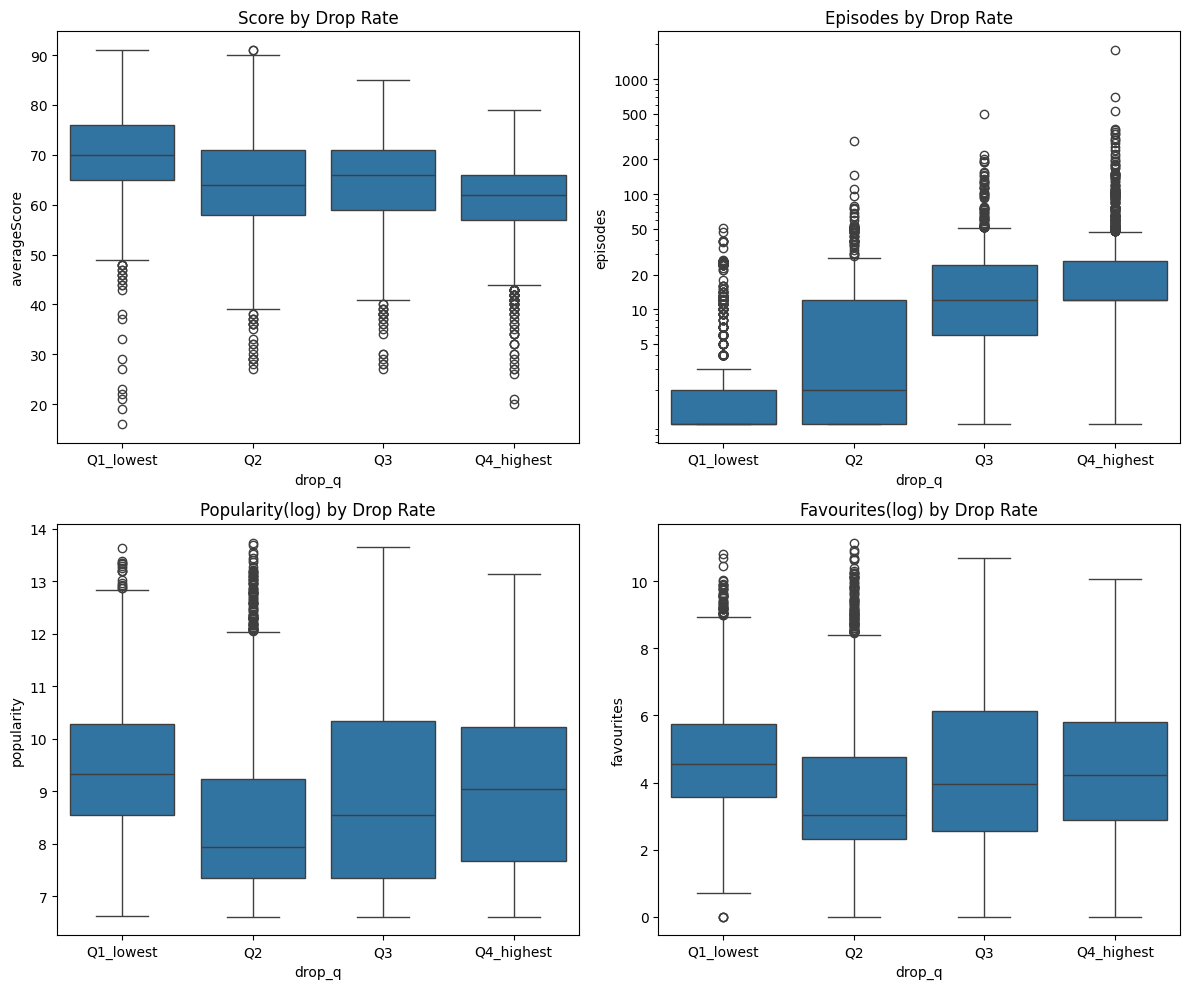

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(data=df_clean_eda, x="drop_q", y="averageScore", ax=axes[0,0])
axes[0,0].set_title("Score by Drop Rate")

sns.boxplot(data=df_clean_eda, x="drop_q", y="episodes", ax=axes[0,1])
axes[0,1].set_yscale("log")
axes[0,1].set_yticks([5, 10, 20, 50, 100, 200, 500, 1000])
axes[0,1].yaxis.set_major_formatter(ticker.ScalarFormatter())
axes[0,1].set_title("Episodes by Drop Rate")

sns.boxplot(data=df_clean_eda, x="drop_q", y=np.log1p(df_clean_eda["popularity"]), ax=axes[1,0])
axes[1,0].set_title("Popularity(log) by Drop Rate")

sns.boxplot(data=df_clean_eda, x="drop_q", y=np.log1p(df_clean_eda["favourites"]), ax=axes[1,1])
axes[1,1].set_title("Favourites(log) by Drop Rate")

plt.tight_layout()
plt.show()

In [44]:
df_clean_eda[df_clean_eda["episodes"] > 1500][
    ["title_romaji", "episodes", "averageScore", "stats_drop_rate"]
].sort_values("episodes", ascending=False).head(10)

,title_romaji,episodes,averageScore,stats_drop_rate
3384,Doraemon (1979),1787.0,75.0,0.115014


## Episodes bin별 평균 drop rate barplot

/var/folders/n6/9fr973913k7931ymsg4ly6rc0000gn/T/ipykernel_59238/4216769976.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("ep_bin")["stats_drop_rate"]


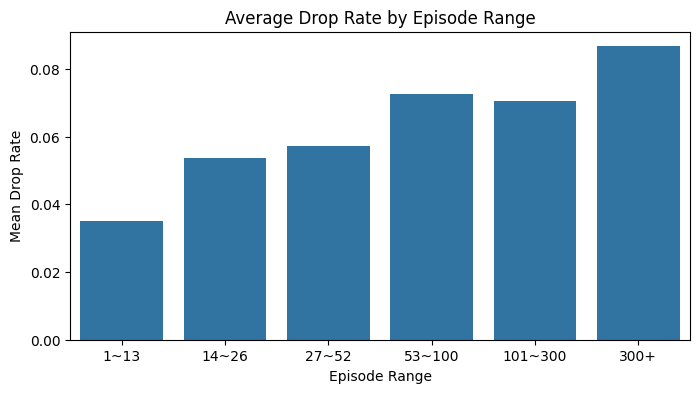

In [57]:
# 1) 회차 구간 나누기
bins = [0, 13, 26, 52, 100, 300, df_clean_eda["episodes"].max()]
labels = ["1~13", "14~26", "27~52", "53~100", "101~300", "300+"]

df_clean_eda["ep_bin"] = pd.cut(
    df_clean_eda["episodes"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# 2) 구간별 평균 드랍률
ep_drop_mean = (
    df_clean_eda
    .groupby("ep_bin")["stats_drop_rate"]
    .mean()
    .reset_index()
)

# 3) barplot
plt.figure(figsize=(8, 4))
sns.barplot(
    data=ep_drop_mean,
    x="ep_bin",
    y="stats_drop_rate"
)
plt.title("Average Drop Rate by Episode Range")
plt.xlabel("Episode Range")
plt.ylabel("Mean Drop Rate")
plt.show()

## 평균 점수 vs drop rate (bin plot)

/var/folders/n6/9fr973913k7931ymsg4ly6rc0000gn/T/ipykernel_59238/1816768221.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("score_bin")["stats_drop_rate"]


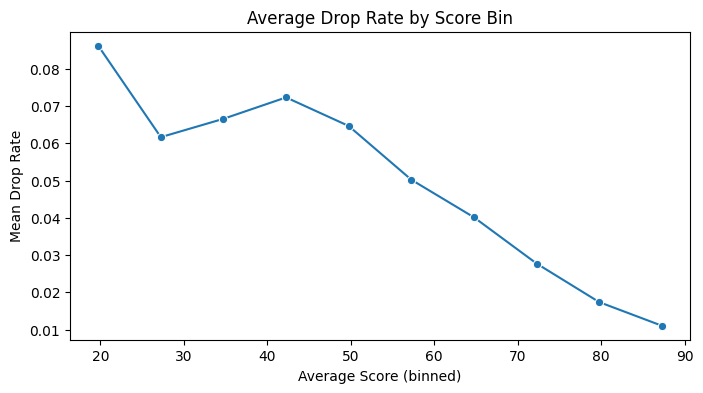

In [59]:
# 점수 구간 나누기 (예: 40~90 사이를 10개 구간)
score_min = df_clean_eda["averageScore"].min()
score_max = df_clean_eda["averageScore"].max()

score_bins = np.linspace(score_min, score_max, 11)
df_clean_eda["score_bin"] = pd.cut(
    df_clean_eda["averageScore"],
    bins=score_bins
)

score_drop_mean = (
    df_clean_eda
    .groupby("score_bin")["stats_drop_rate"]
    .mean()
    .reset_index()
)

# 구간 라벨을 중앙값으로 바꿔서 x축 숫자처럼 보이게
score_drop_mean["score_bin_mid"] = score_drop_mean["score_bin"].apply(
    lambda x: x.mid if pd.notna(x) else np.nan
)

plt.figure(figsize=(8, 4))
sns.lineplot(
    data=score_drop_mean,
    x="score_bin_mid",
    y="stats_drop_rate",
    marker="o"
)
plt.title("Average Drop Rate by Score Bin")
plt.xlabel("Average Score (binned)")
plt.ylabel("Mean Drop Rate")
plt.show()

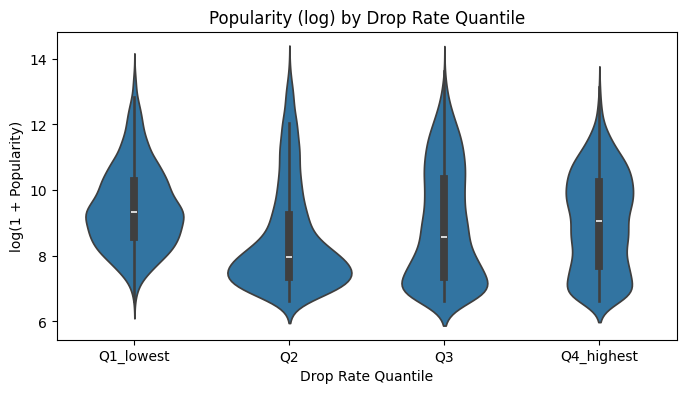

In [ ]:
# log 변환된 popularity 컬럼 하나 만들어두면 편함
df_clean_eda["log_popularity"] = np.log1p(df_clean_eda["popularity"])

plt.figure(figsize=(8, 4))
sns.violinplot(
    data=df_clean_eda,
    x="drop_q",
    y="log_popularity",
    inner="box"  # 안에 boxplot도 같이
)
plt.title("Popularity (log) by Drop Rate Quantile")
plt.xlabel("Drop Rate Quantile")
plt.ylabel("log(1 + Popularity)")
plt.show()

# 역시 의미 없었다.

# drop rate vs. Numerical features inspection result
- drop_rate는 수치형 데이터들과는 예상보다 관련이 많지 않은 것 같다.
- 범주형, 특히 위험 요인에 에임을 두고 분석해보자.

# Target vs. Tag, Genre
- Tag, Genre는 OHE로 df_final에 있다. 쓸거면 merge 해야함 !

In [27]:
# 1) OHE 컬럼들만 추출
ohe_cols = [
    col for col in df_final.columns
    if col.startswith("genre_") or col.startswith("tag_")
]

print("OHE 컬럼 개수:", len(ohe_cols))

# 2) id + OHE만 남긴 슬라이스 준비
df_ohe = df_final[["id"] + ohe_cols]

# 3) df_clean_eda 기준으로 OHE 붙이기
df_merged = df_clean_eda.merge(
    df_ohe,
    on="id",       # 공통 키
    how="left"     # clean 쪽 행을 기준으로 유지
)

print("병합 전 / 후 shape:", df_clean_eda.shape, "→", df_merged.shape)

OHE 컬럼 개수: 221
병합 전 / 후 shape: (8962, 22) → (8962, 243)


In [28]:
# 1) 후보: 이름이 genre_ 또는 tag_로 시작하는 컬럼
maybe_ohe = [c for c in df_merged.columns if c.startswith("genre_") or c.startswith("tag_")]

# 2) 실제 OHE(0/1)인지 검사
ohe_cols = []
for col in maybe_ohe:
    unique_vals = set(df_merged[col].dropna().unique())
    if unique_vals.issubset({0, 1}):
        ohe_cols.append(col)

print("OHE 컬럼 수:", len(ohe_cols))

OHE 컬럼 수: 218


In [29]:
df_ohe = df_merged[ohe_cols + ["stats_drop_rate"]]
corr = df_ohe.corr(method="spearman")["stats_drop_rate"].drop("stats_drop_rate")

In [30]:
# 4) 상관계수 정렬
sorted_corr = corr.sort_values(ascending=False)
print(sorted_corr.head(20))

tag_Episodic                        0.171686
tag_Idol                            0.106366
tag_Card Battle                     0.097748
tag_Magic                           0.097512
tag_Henshin                         0.077946
tag_Cute Girls Doing Cute Things    0.073524
tag_Kids                            0.070687
tag_Surreal Comedy                  0.069020
tag_Isekai                          0.067772
tag_Crossdressing                   0.065844
tag_Male Harem                      0.062945
tag_Slapstick                       0.062060
tag_Super Robot                     0.061930
tag_Otaku Culture                   0.060785
tag_Primarily Female Cast           0.059040
tag_LGBTQ+ Themes                   0.058971
tag_Cute Boys Doing Cute Things     0.058058
tag_Work                            0.057941
tag_Educational                     0.056987
tag_Superhero                       0.056637
Name: stats_drop_rate, dtype: float64


In [31]:
##########################################
# 1) OHE 컬럼 추출 함수
##########################################

def extract_ohe(df, prefix):
    candidates = [c for c in df.columns if c.startswith(prefix)]
    
    ohe = []
    for col in candidates:
        # if not pd.api.types.is_numeric_dtype(df_merged[col]):
        #     continue

        uniques = set(df[col].dropna().unique())
        if uniques.issubset({0, 1}):
            ohe.append(col)
    return ohe


genre_ohe = extract_ohe(df_merged, "genre_")
tag_ohe   = extract_ohe(df_merged, "tag_")

print("Genre OHE:", len(genre_ohe))
print("Tag OHE:", len(tag_ohe))


##########################################
# 2) Spearman 상관 계산 함수
##########################################

def compute_corr(ohe_cols):
    df_temp = df_merged[ohe_cols + ["stats_drop_rate"]]
    corr = df_temp.corr(method="spearman")["stats_drop_rate"]
    return corr.drop("stats_drop_rate").sort_values(ascending=False)

Genre OHE: 18
Tag OHE: 200


In [32]:
TOP_N = 20

genre_corr = compute_corr(genre_ohe)
tag_corr   = compute_corr(tag_ohe)

##########################################
# 3) TOP-N 추출
##########################################

genre_top_high = genre_corr.head(TOP_N)
genre_top_low  = genre_corr.tail(TOP_N)

tag_top_high = tag_corr.head(TOP_N)
tag_top_low  = tag_corr.tail(TOP_N)

In [33]:
TOP_N = 20

# 전체 상관계수
genre_corr = compute_corr(genre_ohe)   # 정렬 X, 그냥 시리즈

# 1) 드랍률 올리는 장르 (양수만)
genre_top_high = (
    genre_corr[genre_corr > 0]             # 양수만
    .sort_values(ascending=False)          # 큰 값부터
    .head(TOP_N)
)

# 2) 드랍률 낮추는 장르 (음수만)
genre_top_low = (
    genre_corr[genre_corr < 0]             # 음수만
    .sort_values(ascending=True)           # 더 작은(더 음수) 것부터
    .head(TOP_N)
)

# 태그도 동일하게
tag_corr = compute_corr(tag_ohe)

tag_top_high = (
    tag_corr[tag_corr > 0]
    .sort_values(ascending=False)
    .head(TOP_N)
)

tag_top_low = (
    tag_corr[tag_corr < 0]
    .sort_values(ascending=True)
    .head(TOP_N)
)

In [34]:
##########################################
# 4) 표 출력
##########################################

print(f"\n===== 드랍률을 가장 높이는 'Genre' TOP {TOP_N} =====\n")
display(genre_top_high.to_frame("Corr_with_DropRate"))

print(f"\n===== 드랍률을 가장 낮추는 'Genre' TOP {TOP_N} =====\n")
display(genre_top_low.to_frame("Corr_with_DropRate"))

print(f"\n===== 드랍률을 가장 높이는 'Tag' TOP {TOP_N} =====\n")
display(tag_top_high.to_frame("Corr_with_DropRate"))

print(f"\n===== 드랍률을 가장 낮추는 'Tag' TOP {TOP_N} =====\n")
display(tag_top_low.to_frame("Corr_with_DropRate"))


===== 드랍률을 가장 높이는 'Genre' TOP 20 =====



,Corr_with_DropRate
genre_Mahou Shoujo,0.037053
genre_Mecha,0.025903
genre_Comedy,0.022950
genre_Ecchi,0.020316
genre_Music,0.018426
genre_Fantasy,0.015752
genre_Slice of Life,0.012648
genre_Sports,0.000707



===== 드랍률을 가장 낮추는 'Genre' TOP 20 =====



,Corr_with_DropRate
genre_Drama,-0.095058
genre_Psychological,-0.069745
genre_Supernatural,-0.042022
genre_Action,-0.041665
genre_Thriller,-0.038852
genre_Mystery,-0.032384
genre_Sci-Fi,-0.021001
genre_Adventure,-0.014080
genre_Horror,-0.012720
genre_Romance,-0.007553



===== 드랍률을 가장 높이는 'Tag' TOP 20 =====



,Corr_with_DropRate
tag_Episodic,0.171686
tag_Idol,0.106366
tag_Card Battle,0.097748
tag_Magic,0.097512
tag_Henshin,0.077946
tag_Cute Girls Doing Cute Things,0.073524
tag_Kids,0.070687
tag_Surreal Comedy,0.069020
tag_Isekai,0.067772
tag_Crossdressing,0.065844



===== 드랍률을 가장 낮추는 'Tag' TOP 20 =====



,Corr_with_DropRate
tag_Kuudere,-0.083917
tag_Shounen,-0.079182
tag_No Dialogue,-0.076406
tag_Philosophy,-0.073709
tag_Ships,-0.065832
tag_Pirates,-0.063143
tag_Primarily Adult Cast,-0.052623
tag_Male Protagonist,-0.049166
tag_Rural,-0.046845
tag_Military,-0.046468


/var/folders/n6/9fr973913k7931ymsg4ly6rc0000gn/T/ipykernel_59238/3719618540.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


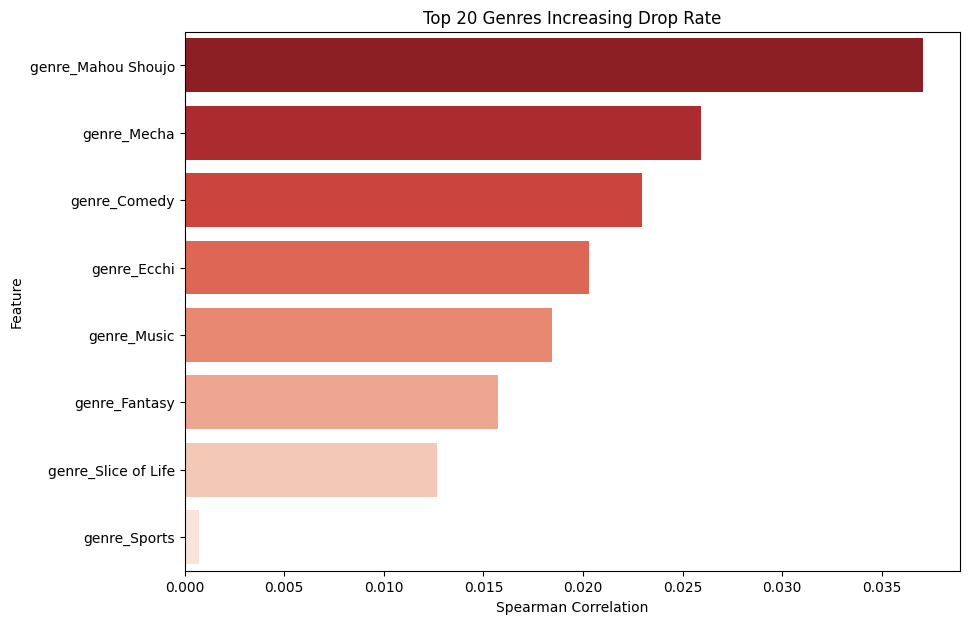

/var/folders/n6/9fr973913k7931ymsg4ly6rc0000gn/T/ipykernel_59238/3719618540.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


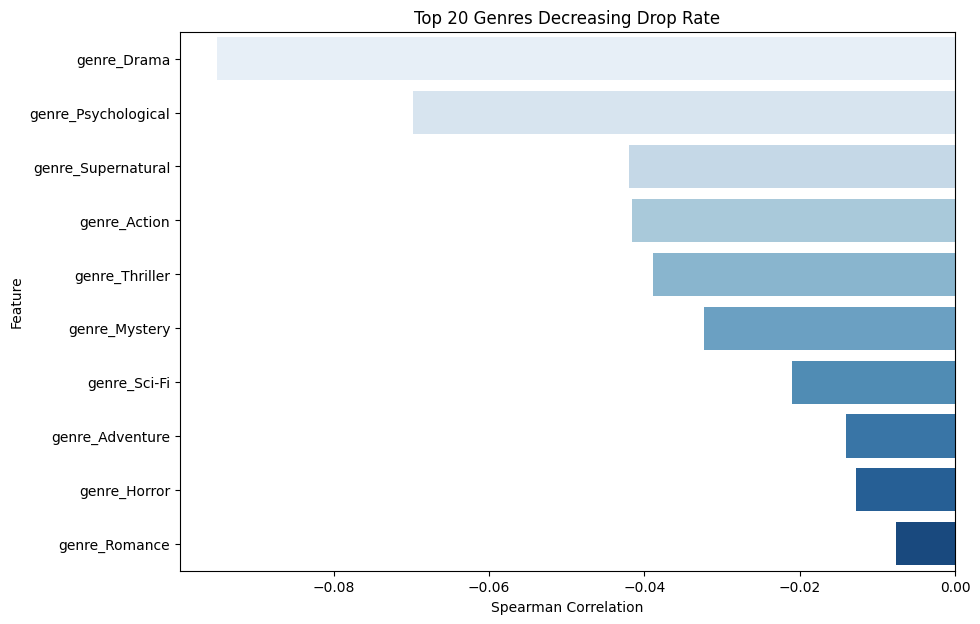

/var/folders/n6/9fr973913k7931ymsg4ly6rc0000gn/T/ipykernel_59238/3719618540.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


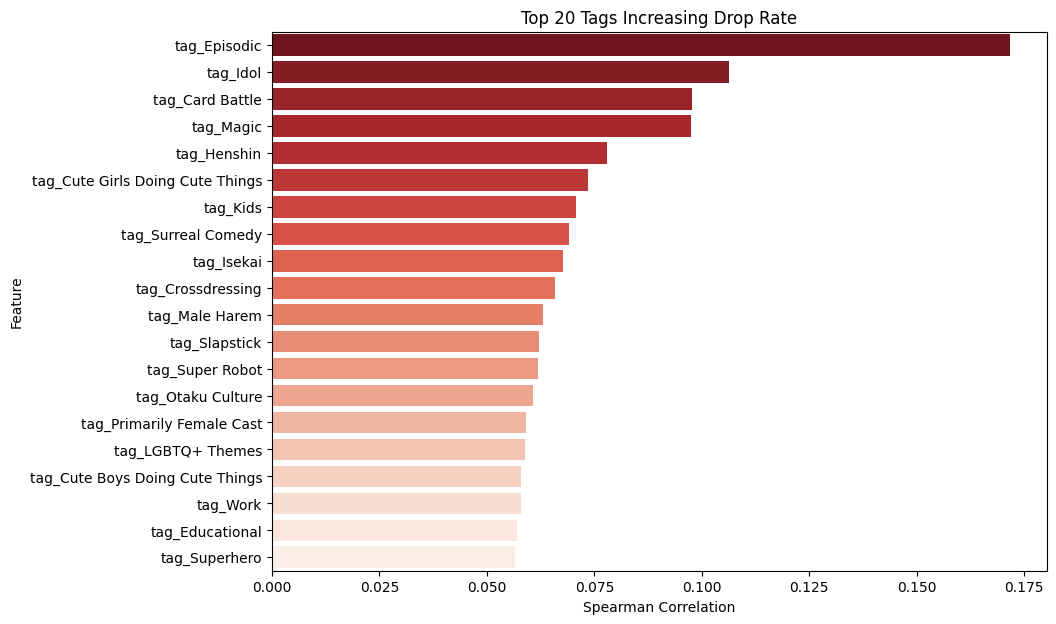

/var/folders/n6/9fr973913k7931ymsg4ly6rc0000gn/T/ipykernel_59238/3719618540.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


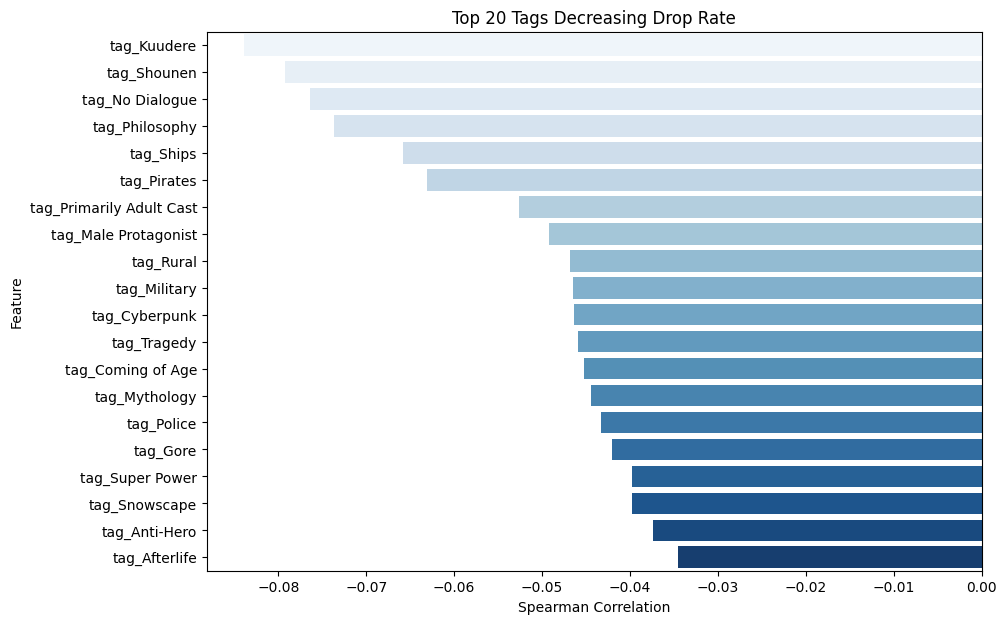

In [35]:
##########################################
# 5) 시각화 함수
##########################################

def plot_corr_bar(series, title, color):
    plt.figure(figsize=(10, TOP_N * 0.35))
    sns.barplot(
        x=series.values,
        y=series.index,
        palette=color
    )
    plt.title(title)
    plt.xlabel("Spearman Correlation")
    plt.ylabel("Feature")
    plt.show()


##########################################
# 6) 장르/태그 시각화
##########################################

plot_corr_bar(genre_top_high,
              f"Top {TOP_N} Genres Increasing Drop Rate",
              "Reds_r")

plot_corr_bar(genre_top_low,
              f"Top {TOP_N} Genres Decreasing Drop Rate",
              "Blues")

plot_corr_bar(tag_top_high,
              f"Top {TOP_N} Tags Increasing Drop Rate",
              "Reds_r")

plot_corr_bar(tag_top_low,
              f"Top {TOP_N} Tags Decreasing Drop Rate",
              "Blues")

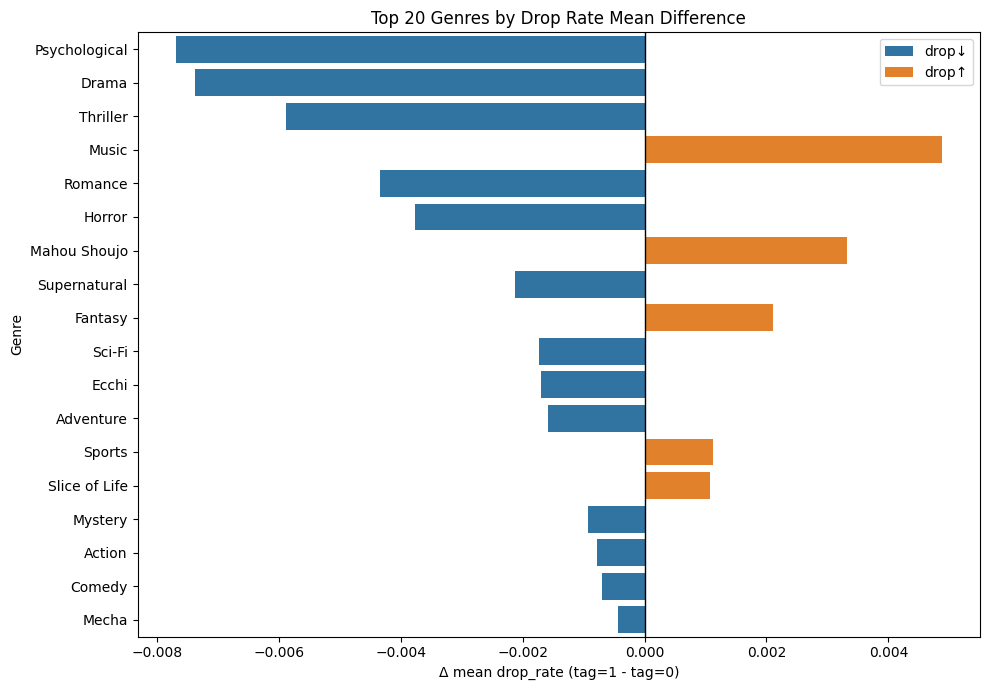

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

TARGET = "stats_drop_rate"
TOP_N = 20

def extract_ohe(df, prefix):
    cols = []
    for c in df.columns:
        if not c.startswith(prefix):
            continue
        if not pd.api.types.is_numeric_dtype(df[c]):
            continue
        uniques = set(df[c].dropna().unique())
        if uniques.issubset({0, 1}):
            cols.append(c)
    return cols

genre_ohe = extract_ohe(df_merged, "genre_")
tag_ohe   = extract_ohe(df_merged, "tag_")

def mean_diff_for_ohe(df, cols, target):
    rows = []
    for c in cols:
        g = df.groupby(c)[target].mean()
        if 0 not in g.index or 1 not in g.index:
            continue  # 희귀 태그는 패스
        mean0 = g.loc[0]
        mean1 = g.loc[1]
        diff = float(mean1 - mean0)
        rows.append({"feature": c, "mean0": mean0, "mean1": mean1, "diff": diff})
    return pd.DataFrame(rows)

genre_diff = mean_diff_for_ohe(df_merged, genre_ohe, TARGET)
tag_diff   = mean_diff_for_ohe(df_merged, tag_ohe, TARGET)

# 영향 큰 순으로 정렬
genre_diff_top = genre_diff.reindex(
    genre_diff["diff"].abs().sort_values(ascending=False).head(TOP_N).index
)

plt.figure(figsize=(10, TOP_N * 0.35))
sns.barplot(
    data=genre_diff_top,
    x="diff",
    y=genre_diff_top["feature"].str.replace("^genre_", "", regex=True),
    hue=np.where(genre_diff_top["diff"] > 0, "drop↑", "drop↓"),
    dodge=False
)
plt.axvline(0, color="black", linewidth=1)
plt.xlabel("Δ mean drop_rate (tag=1 - tag=0)")
plt.ylabel("Genre")
plt.title(f"Top {TOP_N} Genres by Drop Rate Mean Difference")
plt.legend(title="")
plt.tight_layout()
plt.show()